<a href="https://colab.research.google.com/github/vikpy/mtechdatascience_mlcourse/blob/master/lec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Simple linear regression


import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd



In [0]:
# Sesion 1 

In [4]:
dataset = pd.read_csv("/content/Salary_Data.csv")
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
X = dataset.iloc[ : , :-1].values
print("**********************************************************************")
print("X")
print(X)
print("**********************************************************************")


y = dataset.iloc[: , -1].values

print("**********************************************************************")
print("y")
print(y)
print("**********************************************************************")



**********************************************************************
X
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
**********************************************************************
**********************************************************************
y
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]
**********************************************************************


In [0]:
# Splitting the dataset into train and test sets 
from sklearn.model_selection import train_test_split 
# 80-20 ratio the model is split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

In [0]:
# For this particular model we do not need feature scaling 

In [10]:
# Fitting the model using the training data
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Predicting the Test set using predict
y_pred = lm.predict(X_test)
X_test, y_pred

(array([[ 1.5],
        [10.3],
        [ 4.1],
        [ 3.9],
        [ 9.5],
        [ 8.7]]),
 array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
        115249.56285456, 107799.50275317]))

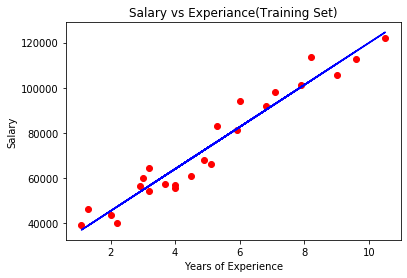

In [18]:
# Visualizing the Training the set results 
plt.scatter(X_train, y_train, color = 'red')
#plt.plot(X_train, y_train, color = 'blue')
plt.plot(X_train, lm.predict(X_train), color='blue')
plt.title("Salary vs Experiance(Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

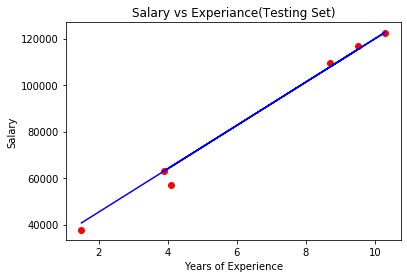

In [21]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color='blue')
plt.title("Salary vs Experiance(Testing Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [37]:
print( {
                               'X test' : X_test.tolist(),
                                'y Test' : y_test.tolist(),
                                'y pred' : y_pred.tolist()
})

{'X test': [[1.5], [10.3], [4.1], [3.9], [9.5], [8.7]], 'y Test': [37731, 122391, 57081, 63218, 116969, 109431], 'y pred': [40748.96184072196, 122699.62295593883, 64961.65717021785, 63099.142144872014, 115249.56285455546, 107799.50275317213]}


In [0]:
# Session 2 

In [0]:
#Importing the data 
dataset_2  = pd.read_csv("/content/Social_Network_Ads.csv")
dataset_2.head(5)
X = dataset_2.iloc[:, [2,3]].values
y = dataset_2.iloc[:, 4].values

In [59]:
# Checking for the null values
dataset_2.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [0]:
# Splitting the data into train and test 
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 1/5, random_state=5 )

In [0]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [63]:
# Fitting Logistic Regression to the model 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the test set results 
y_pred = classifier.predict(X_test)

In [67]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
cm  = confusion_matrix(y_test, y_pred)
cm

array([[44,  9],
       [ 4, 23]])